![image info](https://ineuron.ai/images/ineuron-logo.png)

### OUTLIERS DETECTION & REMOVAL approaches
* Identifying outliers with visualization
*  Z-score method
* Interquartile Range Method( IQR ) method
* Compare Skewness

###  Import Data and Required Packages
**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

**Import the CSV Data as Pandas DataFrame**

In [2]:
#missing value imputation
#outlier detection and handling

In [19]:
df = pd.read_csv('D:/FSDS-iNeuron/3.Resource/Dataset/google_missing_imputed.csv')

In [20]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
Day               0
Month             0
Year              0
dtype: int64

Observation :
- There is no null values

**Show Top 5 Records**

In [21]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
10360,FG Mobile,FAMILY,3.3,130,13.0,5000,Free,0.00,Everyone,Education,2017-12-21,2.0.0,4.0 and up,21,12,2017
10204,Who Viewed My FB Profile,FAMILY,3.4,121,6.3,10000,Free,0.00,Everyone,Entertainment,2017-12-26,2.0,4.0.3 and up,26,12,2017
8793,Dr. Seuss's ABC,FAMILY,4.7,429,12.0,10000,Paid,3.99,Everyone,Books & Reference;Education,2018-02-26,2.05,4.0.3 and up,26,2,2018
3640,Real time Weather Forecast,WEATHER,4.4,4184,10.0,1000000,Free,0.00,Everyone,Weather,2018-03-26,7.1.12.12,5.0 and up,26,3,2018
6321,Eating Show - Food BJ,FAMILY,4.4,103,36.0,10000,Free,0.00,Everyone,Simulation,2017-10-30,1.29,4.1 and up,30,10,2017


In [22]:
df.shape

(10840, 16)

In [23]:
# Finding out the numerical features

num_features=[col for col in df.columns if df[col].dtype!='O']
num_df = df[num_features]
num_df.head()

,Rating,Reviews,Size,Installs,Price,Day,Month,Year
0,4.1,159,19.0,10000,0.0,7,1,2018
1,3.9,967,14.0,500000,0.0,15,1,2018
2,4.7,87510,8.7,5000000,0.0,1,8,2018
3,4.5,215644,25.0,50000000,0.0,8,6,2018
4,4.3,967,2.8,100000,0.0,20,6,2018


### 2 .  Z-score  method
#### Z-score:
- The number of standard deviations away from the mean that a particular observation is.
- A negative Z-score means an observation is below the mean.
- while a positive Z-score means means it above the mean.
- The further away from 0 the Z-Score is, the further away from the mean your observation is.

#x - mean(+ -)/ std

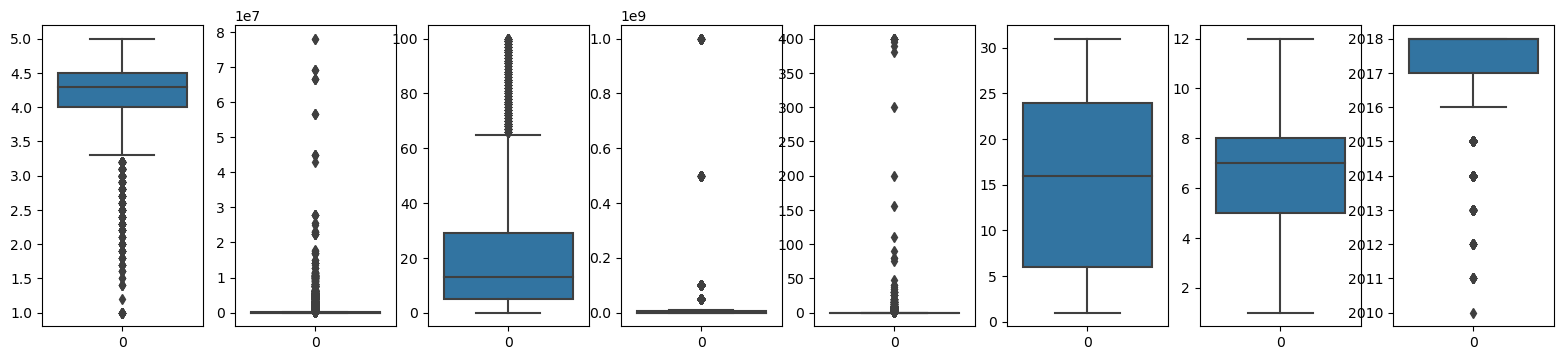

In [24]:
plt.figure(figsize=(22,18))
for i,col in enumerate(num_df.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_df[col], orient='v')

#### Insights
- Except Day and month feature we have outliers in all other features

In [25]:
# Function to detect outliers

def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [26]:
## function to remove outliers

def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [27]:
replace_with_thresholds(num_df, num_df.columns)

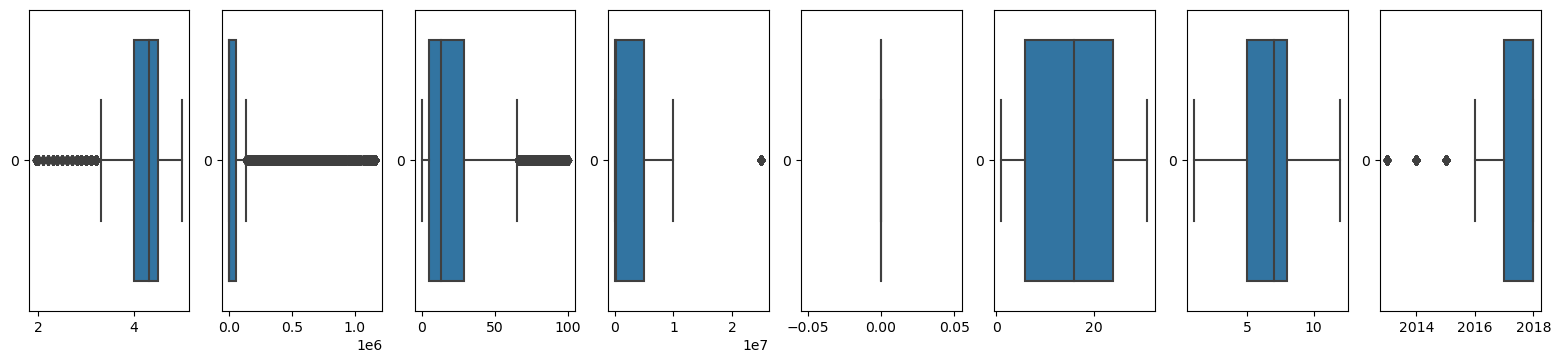

In [28]:
plt.figure(figsize=(22,18))
for i,col in enumerate(num_df.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_df[col], orient='h')

#### Insights
- As we can see from above boxplots outliers are not removed properly

### 3.  Interquartile Range Method( IQR ) method

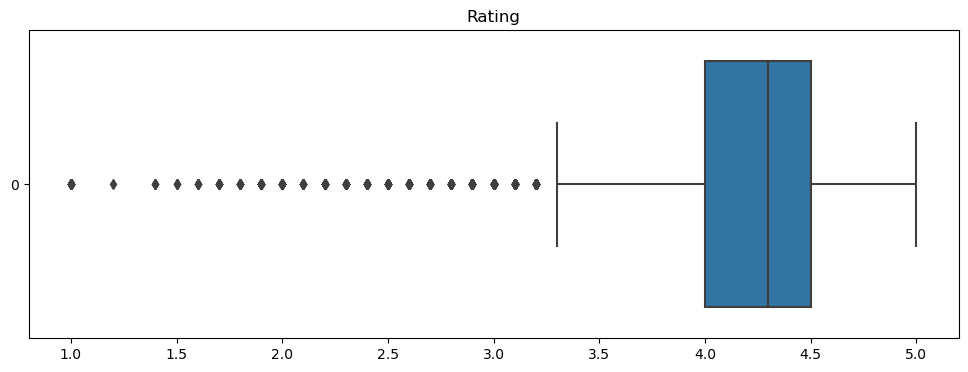

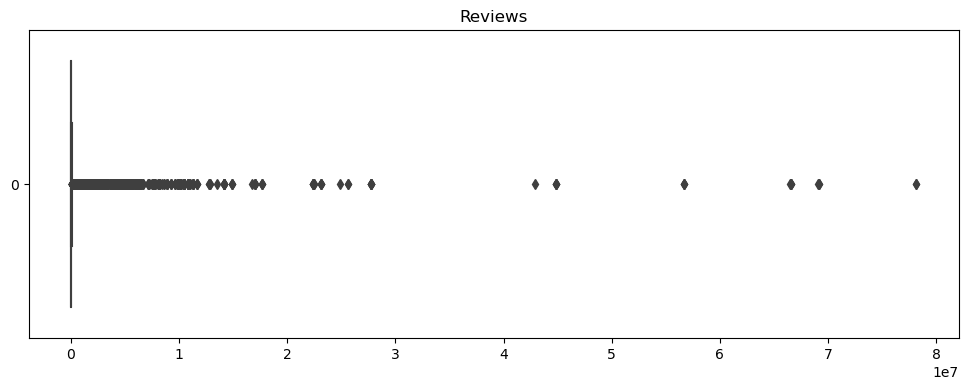

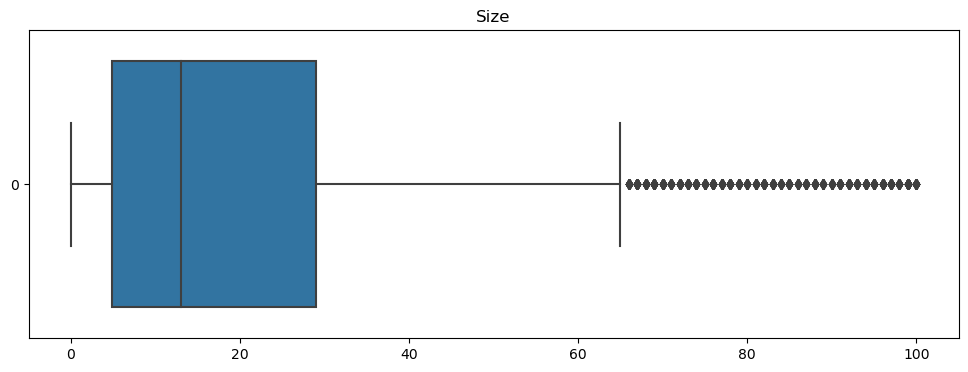

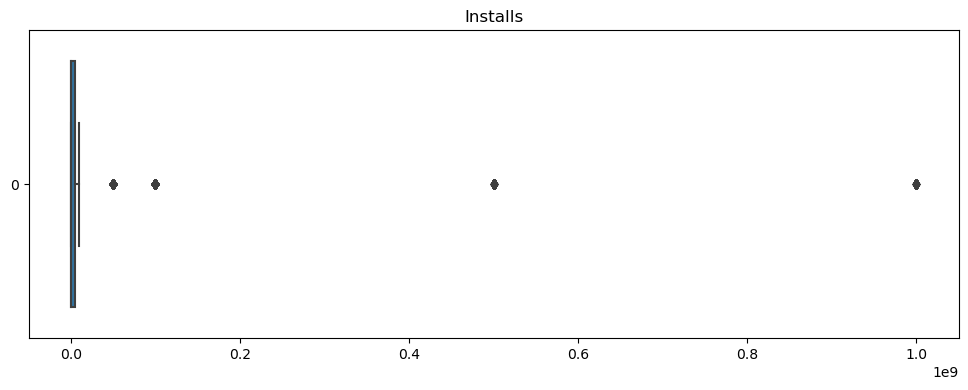

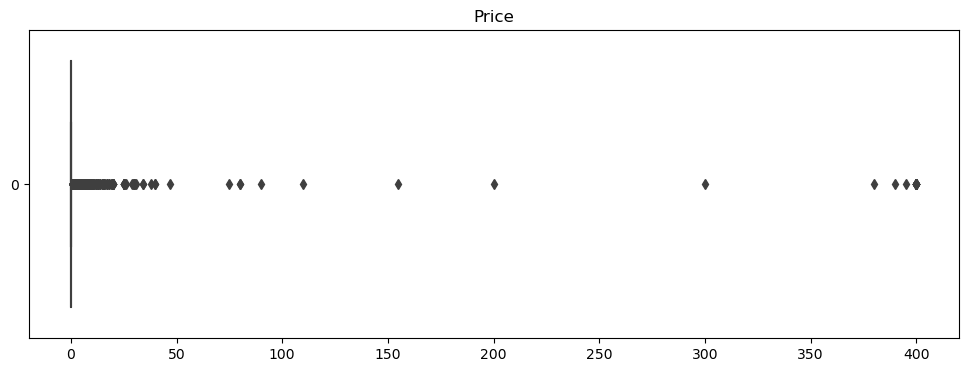

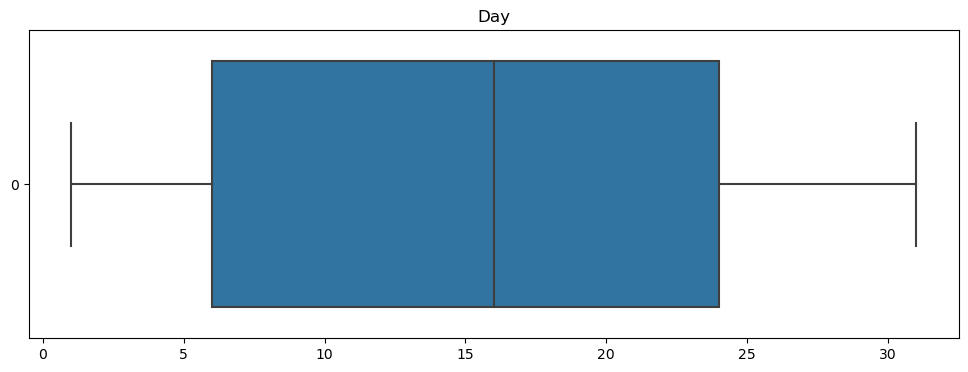

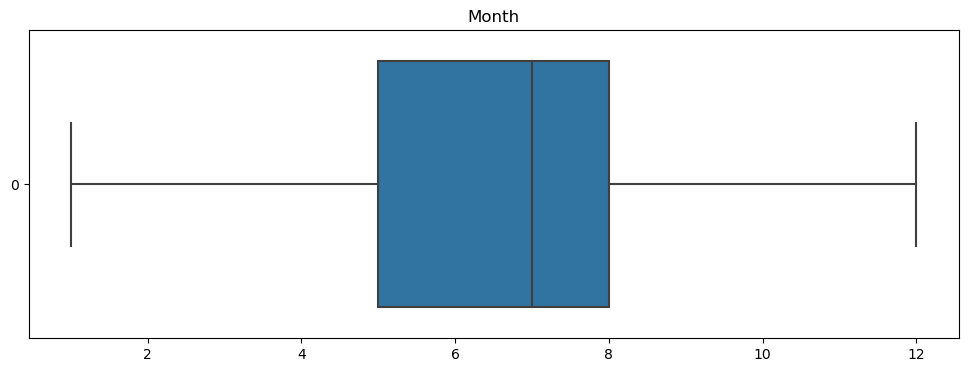

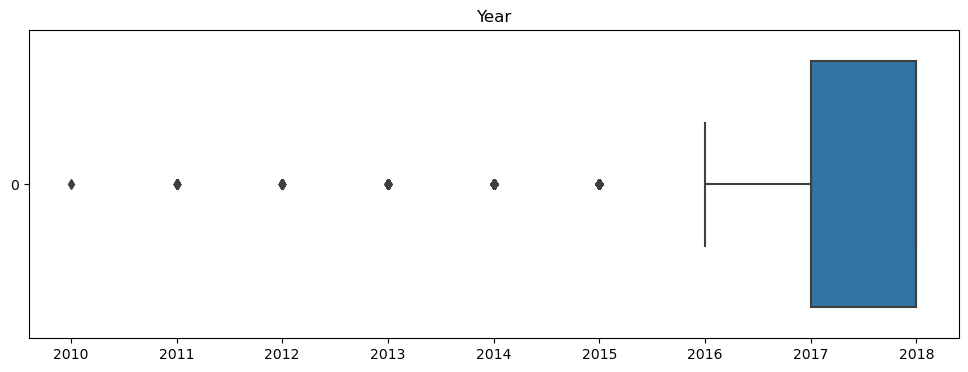

In [31]:
for col in num_df.columns:
    plt.figure(figsize=(12,4))
    sns.boxplot(df[col], orient='h')
    plt.title(col)

In [32]:
df1 = df.copy()
def remove_outliers_IQR(col):
    # Finding the IQR
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df1[col] = np.where(df1[col]>upper_limit, upper_limit, np.where(df1[col]<lower_limit,lower_limit,df1[col]))
    return df1[df1[col] > upper_limit]

In [33]:
remove_outliers_IQR('Size')

percentile25 4.9
percentile75 29.0
Upper limit 65.15
Lower limit -31.250000000000007


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year


In [34]:
def create_comparison_plot(df,df1,column):
    # Comparing
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(df[column])

    plt.subplot(2,2,2)
    sns.boxplot(df[column])

    plt.subplot(2,2,3)
    sns.distplot(df1[column])

    plt.subplot(2,2,4)
    sns.boxplot(df1[column])

    plt.show()

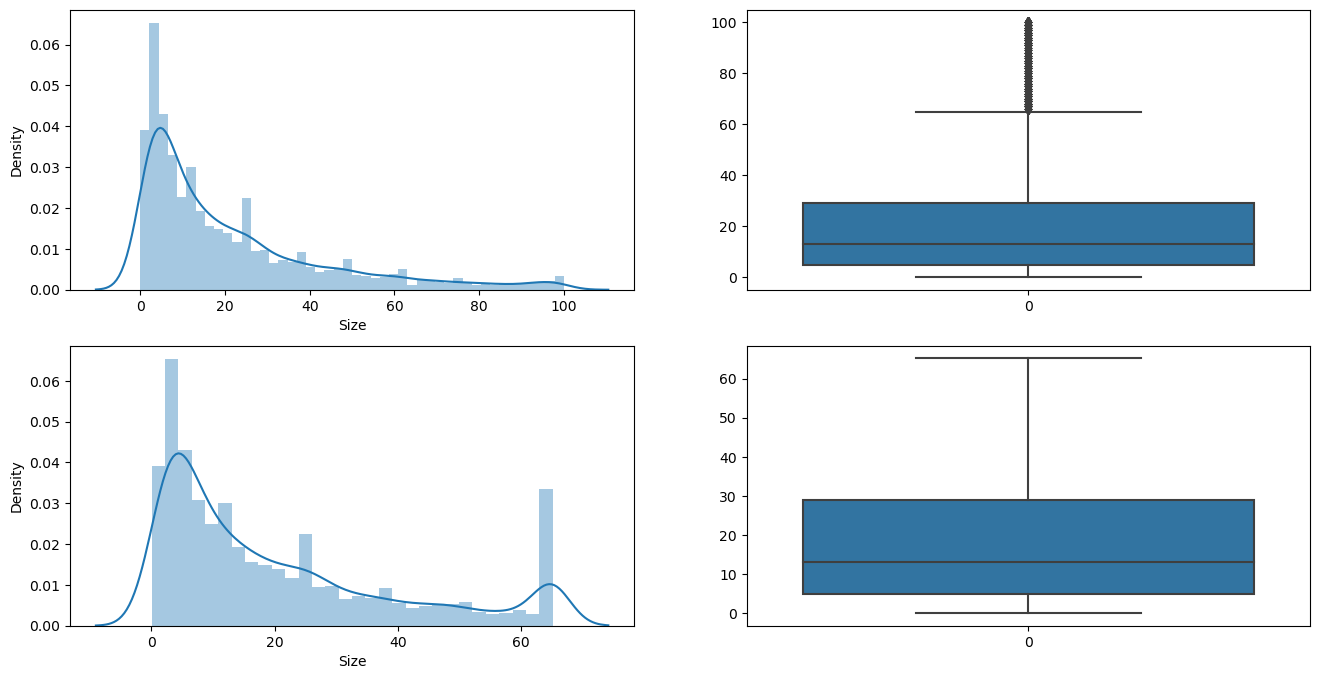

In [35]:
create_comparison_plot(df,df1,"Size")

In [36]:
remove_outliers_IQR('Rating')

percentile25 4.0
percentile75 4.5
Upper limit 5.25
Lower limit 3.25


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year


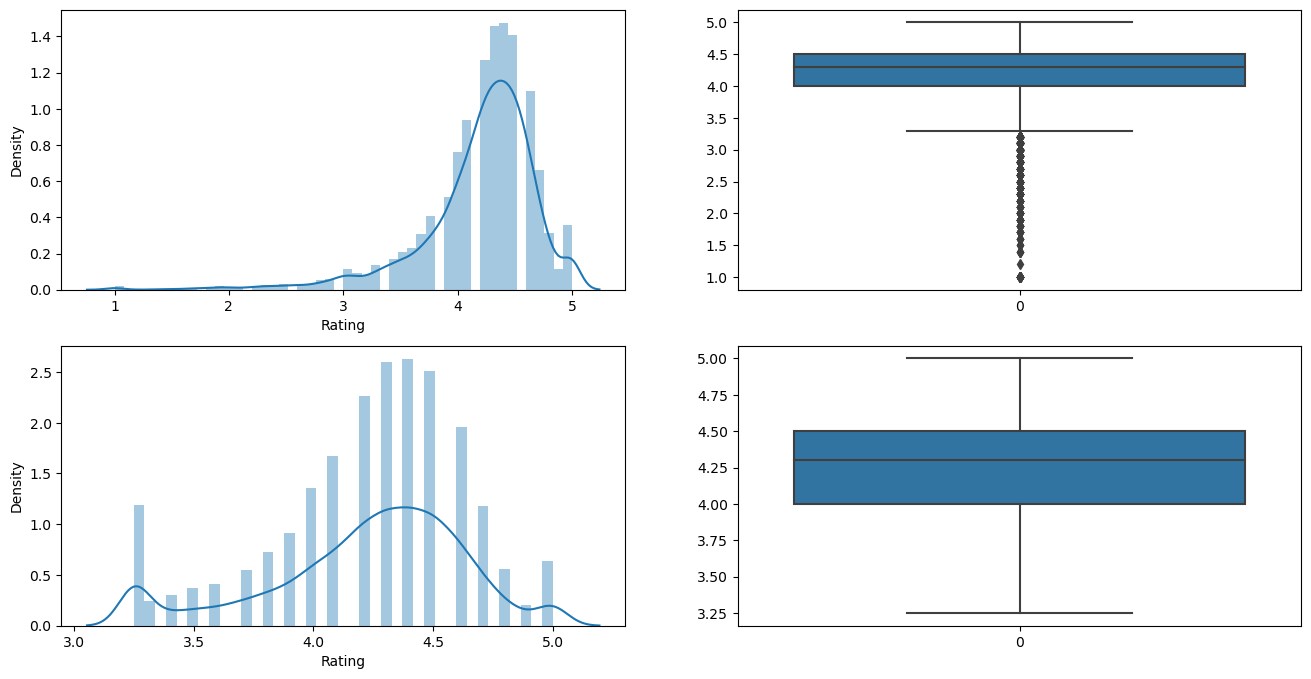

In [37]:
create_comparison_plot(df,df1,"Rating")

In [38]:
remove_outliers_IQR('Reviews')

percentile25 38.0
percentile75 54775.5
Upper limit 136881.75
Lower limit -82068.25


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year


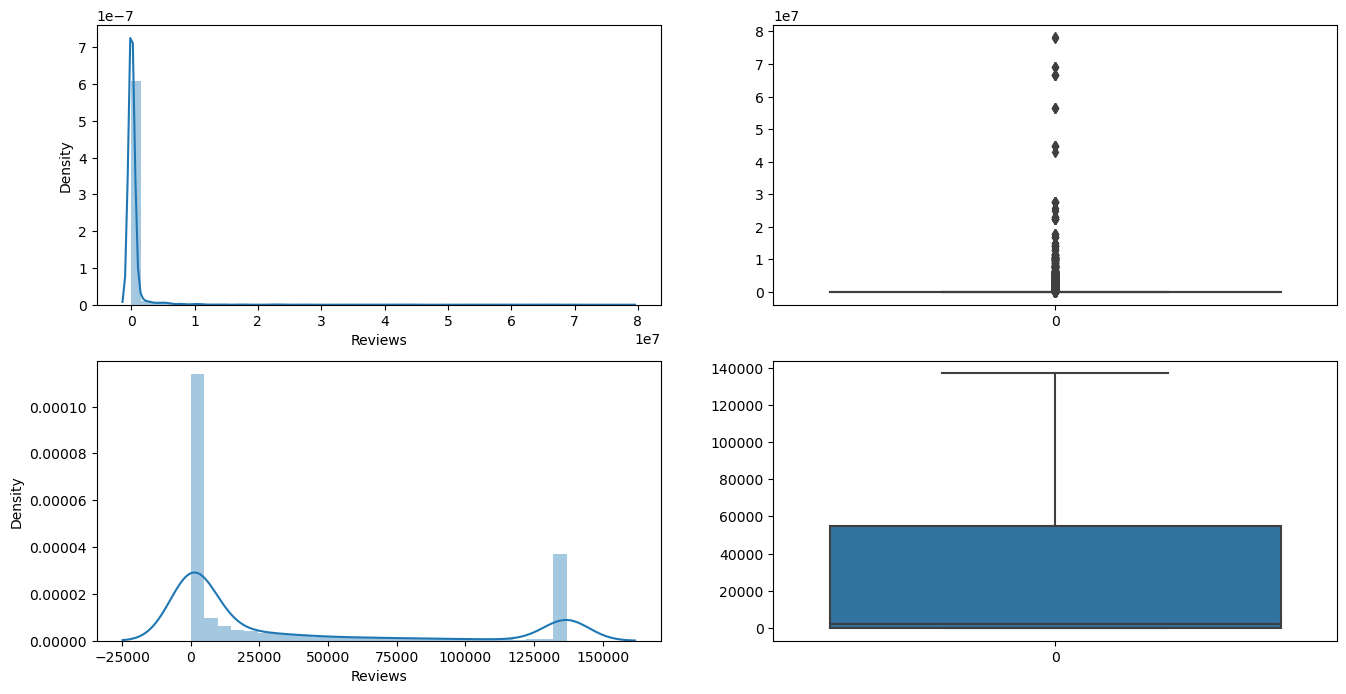

In [39]:
create_comparison_plot(df,df1,"Reviews")

In [40]:
remove_outliers_IQR('Installs')

percentile25 1000.0
percentile75 5000000.0
Upper limit 12498500.0
Lower limit -7497500.0


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year


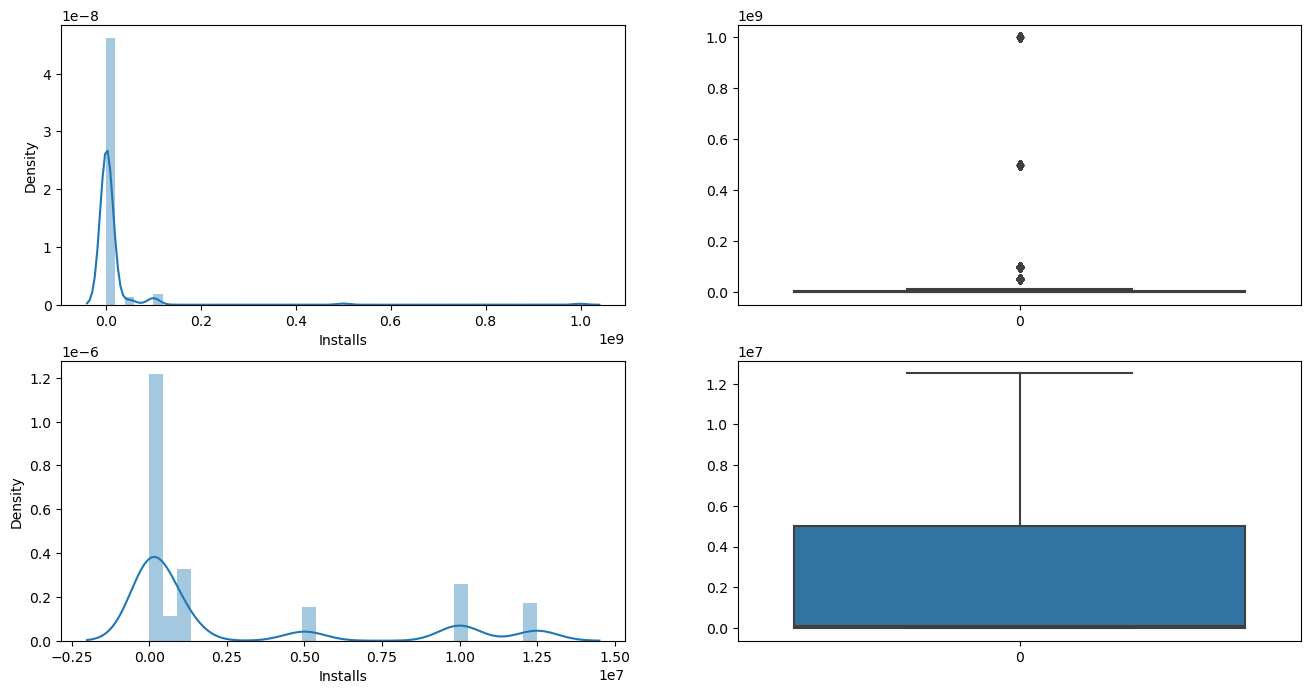

In [41]:
create_comparison_plot(df,df1,"Installs")

In [42]:
remove_outliers_IQR('Year')

percentile25 2017.0
percentile75 2018.0
Upper limit 2019.5
Lower limit 2015.5


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year


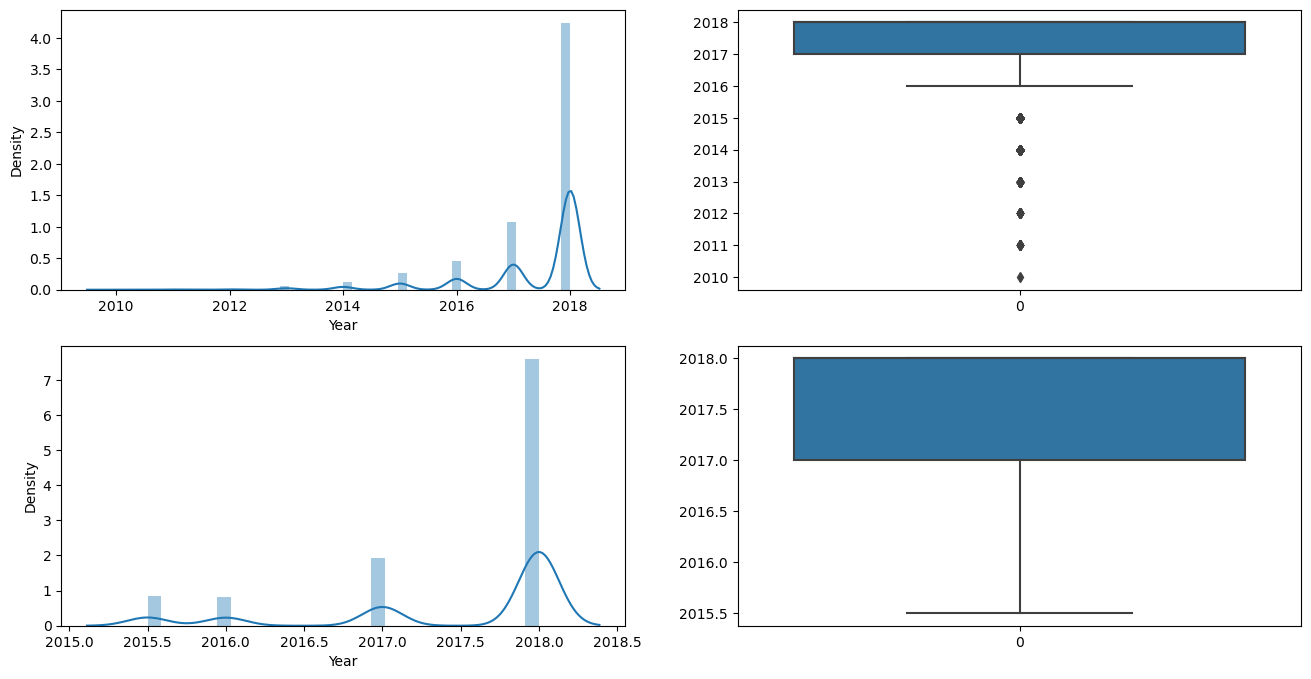

In [43]:
create_comparison_plot(df,df1,"Year")

### 4. Compare Skewness

In [44]:
df.skew()

Rating      -1.873696
Reviews     16.449584
Size         1.563704
Installs     9.572067
Price       23.707392
Day         -0.002569
Month       -0.114442
Year        -2.288293
dtype: float64

In [45]:
df1.skew()

Rating      -0.691460
Reviews      1.197882
Size         1.093473
Installs     1.384312
Price       23.707392
Day         -0.002569
Month       -0.114442
Year        -1.371946
dtype: float64

#### Insights
- Skewness is reduced after we have removed ouliers using IQR Method

In [46]:
df1.to_csv('data/google_outliers.csv',index=False)